<a href="https://colab.research.google.com/github/Wipada6430205202/myproject4/blob/main/Project_Tilapia_with_TP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Growth Function

In [30]:
import numpy as np
# กำหนดค่าพารามิเตอร์
Ws = 500
t0 = -0.33296
b = 3
K = 0.0106590783486797
t = 200
def W(t) :
  return Ws * (1 - np.exp(-K*(t-t0)))** b

print("t = ",t)
print("Wt = ",W(t))

t =  200
Wt =  342.82944226859314


## Growth Rate

In [31]:
t = 200
def diffW(t) :
  return Ws * b* ((1 - np.exp(-K*(t-t0)))** (b-1))*K*np.exp(-K*(t-t0))

print("t = ",t)
print("Growth Rate = ",diffW(t))

t =  200
Growth Rate =  1.469509976559209


#Inventory

##กำหนดค่า

In [32]:
Ws = 500
W0 = 33
t0 = -0.33296
K = 0.0106590783486797
theta = 0.00048219 #จาก 16.17% -> 0.176/365วัน
y = 2000  # ตัวอย่างค่าของ y
Cp = 0.12
Cf = 0.01
Ch = 0.0001
Cm = 0.0007252
CC = 2300
p = 0.0548 # ตัวอย่าง
d = 11927.16 #11927.16 #42386.45
f = 123768.45 #123768.45 #4084.64

##I1

In [33]:
import numpy as np

def I1(t):
    term1 = y * Ws * np.exp(-theta * t) * (-3 * np.exp(-K * (t - t0)) + 3 * np.exp(-2 * K * (t - t0)) - np.exp(-3 * K * (t - t0)))
    term2 = y * (W0 + 3 * Ws * np.exp(K * t0) - 3 * Ws * np.exp(2 * K * t0) + Ws * np.exp(3 * K * t0)) * np.exp(-theta * t)

    return term1 + term2

# ทดสอบฟังก์ชันที่ค่า np.arange(start, stop ,step)
t1_values = np.arange(0, 241, 30)  # สร้าง array ของ t จาก 0 ถึง 5
I1_values = [I1(t) for t in t1_values]  # คำนวณ I1(t) สำหรับ t แต่ละค่า

# แสดงผลลัพธ์
for t, I1_val in zip(t1_values, I1_values):
    print(f"I1({t}) = {I1_val}")


I1(0) = 66000.0
I1(30) = 85833.06864328543
I1(60) = 167797.72886502126
I1(90) = 289424.87598902744
I1(120) = 418524.1091232486
I1(150) = 535155.630206296
I1(180) = 630993.9441027716
I1(210) = 704809.0061964628
I1(240) = 758797.5601963107


###กราฟ I1

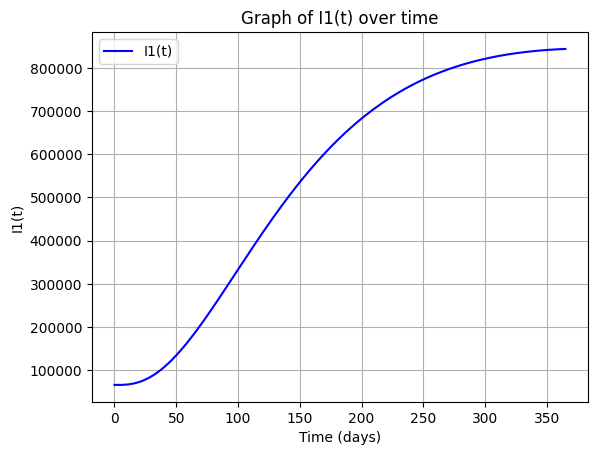

In [34]:
import matplotlib.pyplot as plt
# คำนวณค่า I1(t) สำหรับช่วงเวลา t
t_values = np.linspace(0, 365, 1000)  # เวลาจาก 0 ถึง 365
I1_values = I1(t_values)  # คำนวณ I1(t) สำหรับทุกค่า t

# วาดกราฟ
plt.plot(t_values, I1_values, label='I1(t)', color='blue')
plt.title('Graph of I1(t) over time')
plt.xlabel('Time (days)')
plt.ylabel('I1(t)')
plt.grid(True)
plt.legend()
plt.show()


##I2 ใหม่


In [35]:
import numpy as np

# ฟังก์ชัน I2(t)
def I2(t, p, T):
    Dp = d - f * p
    term1 = y * Ws * np.exp(-theta * t) * (-3 * np.exp(-K * (t - t0)) + 3 * np.exp(-2 * K * (t - t0)) - np.exp(-3 * K * (t - t0)))
    term2 = - Dp / theta
    term3 = y * Ws * np.exp(-theta * t) * (3 * np.exp(-K * (T - t0)) - 3 * np.exp(-2 * K * (T - t0)) + np.exp(-3 * K * (T - t0)))
    term4 = (Dp / theta) * np.exp(theta * (T - t))
    return term1 + term2 + term3 + term4

# ฟังก์ชันคำนวณค่า I2(t1, T) ในช่วง t1 และ T
def cal_I2(t1_range, T_range):
    for T in T_range:
        print(f"\n### Results for T = {T} ###")
        for t1 in t1_range:
            if t1 <= T:
                I2_value = I2(t1, p, T)
                print(f"I2({t1}, {T}) = {I2_value:.4f} | p = {p:.4f}")

# กำหนดช่วงค่า t1 และ T
t1_range = np.arange(0, 241, 30)  # ช่วงของ t1 (0 ถึง 240, เพิ่มทีละ 30)
T_range = np.arange(240, 366, 30)  # ช่วงของ T (240 ถึง 365, เพิ่มทีละ 30)

# คำนวณและแสดงผล
cal_I2(t1_range, T_range)


### Results for T = 240 ###
I2(0, 240) = 523104.7060 | p = 0.0548
I2(30, 240) = 383144.5140 | p = 0.0548
I2(60, 240) = 307610.7965 | p = 0.0548
I2(90, 240) = 274001.4905 | p = 0.0548
I2(120, 240) = 250093.7104 | p = 0.0548
I2(150, 240) = 215915.6399 | p = 0.0548
I2(180, 240) = 163110.2253 | p = 0.0548
I2(210, 240) = 90416.3170 | p = 0.0548
I2(240, 240) = 0.0000 | p = 0.0548

### Results for T = 270 ###
I2(0, 270) = 642434.7735 | p = 0.0548
I2(30, 270) = 500760.8139 | p = 0.0548
I2(60, 270) = 423537.9411 | p = 0.0548
I2(90, 270) = 388263.7388 | p = 0.0548
I2(120, 270) = 362714.9730 | p = 0.0548
I2(150, 270) = 326919.4838 | p = 0.0548
I2(180, 270) = 272519.8793 | p = 0.0548
I2(210, 270) = 198254.6760 | p = 0.0548
I2(240, 270) = 106289.6304 | p = 0.0548

### Results for T = 300 ###
I2(0, 300) = 777835.9022 | p = 0.0548
I2(30, 300) = 634217.3693 | p = 0.0548
I2(60, 300) = 555077.8502 | p = 0.0548
I2(90, 300) = 517914.5277 | p = 0.0548
I2(120, 300) = 490503.7724 | p = 0.0548
I2(150, 300) =

###กราฟ I2

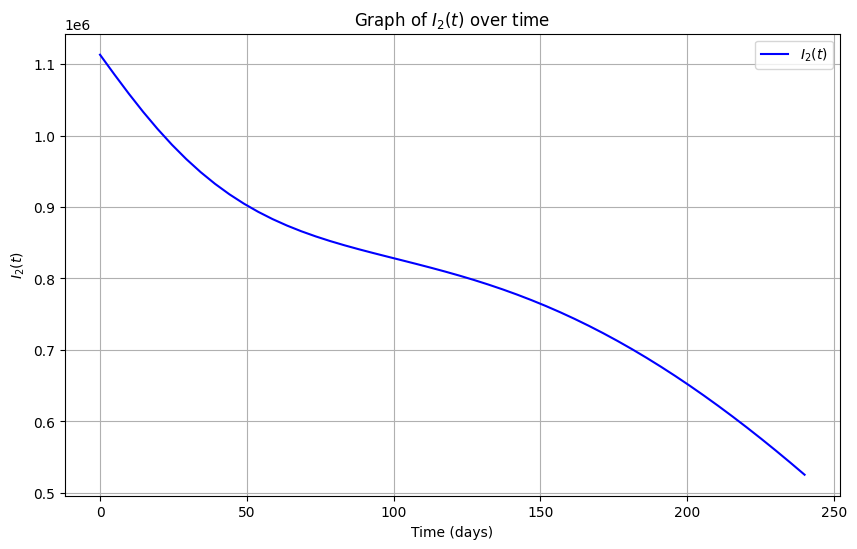

In [36]:
import matplotlib.pyplot as plt
T = 365
# สร้างข้อมูลของเวลา t ตั้งแต่ 0 ถึง T
t_values = np.linspace(0, 240)

# คำนวณค่า I2 สำหรับแต่ละค่า t
I2_values = [I2(t,p,T) for t in t_values]

plt.figure(figsize=(10, 6))
plt.plot(t_values, I2_values, label=r'$I_2(t)$', color='blue')
plt.title(r'Graph of $I_2(t)$ over time')
plt.xlabel('Time (days)')
plt.ylabel(r'$I_2(t)$')
plt.grid(True)
plt.legend()
plt.show()

##กราฟ I1,I2

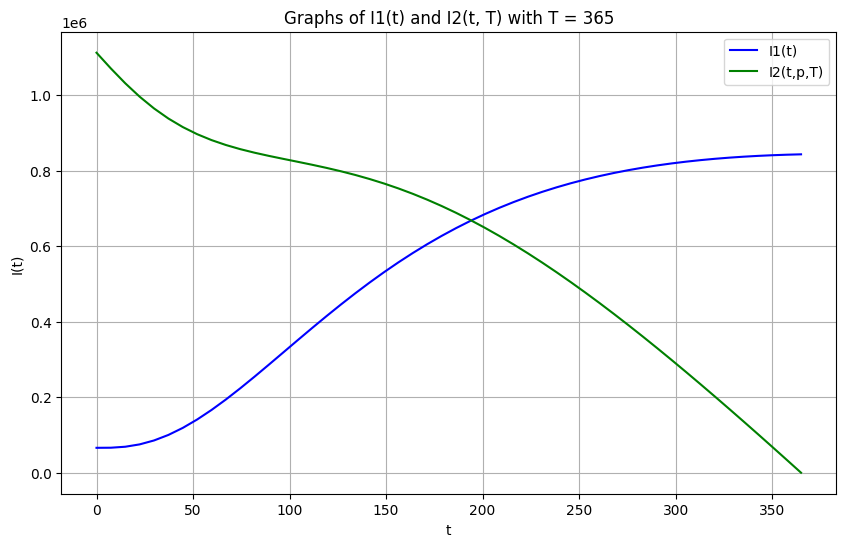

In [37]:
import numpy as np
import matplotlib.pyplot as plt

# สร้างค่าของ t ตั้งแต่ 0 ถึง T
t_values = np.linspace(0, 365)

# คำนวณค่า I1(t) และ I2(t, T)
I1_values = I1(t_values)
I2_values = I2(t_values,p,365)

# สร้างกราฟ
plt.figure(figsize=(10, 6))

# วาดกราฟ I1(t)
plt.plot(t_values, I1_values, label="I1(t)", color="blue")

# วาดกราฟ I2(t, T)
plt.plot(t_values, I2_values, label="I2(t,p,T)", color="green")

# ตั้งชื่อแกนและชื่อกราฟ
plt.title("Graphs of I1(t) and I2(t, T) with T = 365")
plt.xlabel("t")
plt.ylabel("I(t)")
plt.legend()

# แสดงกราฟ
plt.grid(True)
plt.show()

# TP & Optimal t1,p,T

In [38]:

import numpy as np
from scipy.optimize import minimize
from scipy.integrate import quad

# Feeding function
def feeding_function(t):
    if t <= 28:
        return 4 / 100
    elif t <= 52:
        return 3 / 100
    else:
        return 1.5 / 100

# Inventory function I1(t)
def I1(t):
    term1 = y * Ws * np.exp(-theta * t) * (-3 * np.exp(-K * (t - t0)) + 3 * np.exp(-2 * K * (t - t0)) - np.exp(-3 * K * (t - t0)))
    term2 = y * (W0 + 3 * Ws * np.exp(K * t0) - 3 * Ws * np.exp(2 * K * t0) + Ws * np.exp(3 * K * t0)) * np.exp(-theta * t)
    return term1 + term2

# ฟังก์ชัน I2(t)
def I2(t, p, T):
    Dp = d - f * p
    term1 = y * Ws * np.exp(-theta * t) * (-3 * np.exp(-K * (t - t0)) + 3 * np.exp(-2 * K * (t - t0)) - np.exp(-3 * K * (t - t0)))
    term2 = - Dp / theta
    term3 = y * Ws * np.exp(-theta * t) * (3 * np.exp(-K * (T - t0)) - 3 * np.exp(-2 * K * (T - t0)) + np.exp(-3 * K * (T - t0)))
    term4 = (Dp / theta) * np.exp(theta * (T - t))
    return term1 + term2 + term3 + term4

# Total Cost (TC)
def total_cost(t1, T, p):
    PC = Cp * y * W0  # Purchase cost

    # Feeding cost
    FC1 = Cf * quad(lambda t: feeding_function(t) * I1(t), 0, t1)[0]
    FC2 = Cf * quad(lambda t: feeding_function(t) * I2(t, p, T), t1, T)[0]

    # Holding cost
    HC1 = Ch * quad(lambda t: I1(t), 0, t1)[0]
    HC2 = Ch * quad(lambda t: I2(t, p, T), t1, T)[0]

    # Mortality cost
    MC1 = theta * Cm * quad(lambda t: I1(t), 0, t1)[0]
    MC2 = theta * Cm * quad(lambda t: I2(t, p, T), t1, T)[0]

    # Total cost
    return PC + FC1 + HC1 + MC1 + FC2 + HC2 + MC2 + CC

# Total Revenue (TR)
def total_revenue(t1, T, p):
    Dp = d - f * p
    return Dp * (T - t1) * p

# Total Profit (TP)
def total_profit(params):
    t1, T, p = params
    TR = total_revenue(t1, T, p)  # Revenue
    TC = total_cost(t1, T, p)  # Cost
    return -(TR - TC)  # Minimize negative profit

# Constraint to ensure T >= t1
def constraint_T_greater_than_t1(params):
    t1, T, _ = params
    return T - t1

# Constraint to ensure I1(t1) = I2(t1)
def continuity_constraint(params):
    t1, T, p = params
    return I1(t1) - I2(t1, p, T)

# Initial guess and bounds [t1, T, p]
initial_guess = [100, 365, 0.045]  # Initial values for t1, T, p
bounds = [(0, 120), (90, 365), (0.0425, 0.0548)]  # Bounds for t1, T, p

# Define the constraints
constraints = [
    {'type': 'ineq', 'fun': constraint_T_greater_than_t1},  # T >= t1
    {'type': 'eq', 'fun': continuity_constraint}  # I1(t1) = I2(t1)
]

# Optimize
result = minimize(total_profit, initial_guess, bounds=bounds, constraints=constraints, method='SLSQP')

# Display results
print("Optimal Parameters:")
print("t1:", result.x[0])
print("T:", result.x[1])
print("p (price):", result.x[2])
print("Maximum Total Profit:", -result.fun)

<ipython-input-38-f28a0847bc4c>:34: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  FC1 = Cf * quad(lambda t: feeding_function(t) * I1(t), 0, t1)[0]


Optimal Parameters:
t1: 72.48173174942852
T: 217.31022451351038
p (price): 0.0548
Maximum Total Profit: 22790.694545834165


##โค้ดใหม่

In [39]:
import numpy as np
from scipy.optimize import minimize
from scipy.integrate import quad

# ฟังก์ชันการให้อาหาร
def feeding_function(t):
    if t <= 28:
        return 4 / 100
    elif t <= 52:
        return 3 / 100
    else:
        return 1.5 / 100

# ฟังก์ชัน I1(t)
def I1(t):
    term1 = y * Ws * np.exp(-theta * t) * (-3 * np.exp(-K * (t - t0)) + 3 * np.exp(-2 * K * (t - t0)) - np.exp(-3 * K * (t - t0)))
    term2 = y * (W0 + 3 * Ws * np.exp(K * t0) - 3 * Ws * np.exp(2 * K * t0) + Ws * np.exp(3 * K * t0)) * np.exp(-theta * t)
    return term1 + term2

# ฟังก์ชัน I2(t)
def I2(t, p, T):
    Dp = d - f * p
    term1 = y * Ws * np.exp(-theta * t) * (-3 * np.exp(-K * (t - t0)) + 3 * np.exp(-2 * K * (t - t0)) - np.exp(-3 * K * (t - t0)))
    term2 = - Dp / theta
    term3 = y * Ws * np.exp(-theta * t) * (3 * np.exp(-K * (T - t0)) - 3 * np.exp(-2 * K * (T - t0)) + np.exp(-3 * K * (T - t0)))
    term4 = (Dp / theta) * np.exp(theta * (T - t))
    return term1 + term2 + term3 + term4

# ฟังก์ชันการอินทิเกรตที่ปลอดภัย
def safe_integrate(func, a, b):
    try:
        return quad(func, a, b, limit=100)[0]
    except:
        mid = (a + b) / 2
        return safe_integrate(func, a, mid) + safe_integrate(func, mid, b)

# ฟังก์ชันต้นทุนรวม (TC)
def total_cost(t1, T, p):
    PC = Cp * y * W0  # ต้นทุนการซื้อ

    # ต้นทุนอาหาร
    FC1 = Cf * safe_integrate(lambda t: feeding_function(t) * I1(t), 0, t1)
    FC2 = Cf * safe_integrate(lambda t: feeding_function(t) * I2(t, p, T), t1, T)

    # ต้นทุนการเก็บรักษา
    HC1 = Ch * safe_integrate(lambda t: I1(t), 0, t1)
    HC2 = Ch * safe_integrate(lambda t: I2(t, p, T), t1, T)

    # ต้นทุนการตาย
    MC1 = theta * Cm * safe_integrate(lambda t: I1(t), 0, t1)
    MC2 = theta * Cm * safe_integrate(lambda t: I2(t, p, T), t1, T)

    # ต้นทุนรวม
    return PC + FC1 + HC1 + MC1 + FC2 + HC2 + MC2 + CC

# ฟังก์ชันรายได้รวม (TR)
def total_revenue(t1, T, p):
    Dp = d - f * p
    return Dp * (T - t1) * p

# ฟังก์ชันกำไร (TP)
def total_profit(params):
    t1, T, p = params
    TR = total_revenue(t1, T, p)  # รายได้
    TC = total_cost(t1, T, p)  # ต้นทุน
    return -(TR - TC)  # หาค่าที่ทำให้กำไรสูงสุด

# ข้อจำกัด T >= t1
def constraint_T_greater_than_t1(params):
    t1, T, _ = params
    return T - t1

# ข้อจำกัด I1(t1) = I2(t1)
def continuity_constraint(params):
    t1, T, p = params
    return I1(t1) - I2(t1, p, T)

# ค่าเริ่มต้นและขอบเขตของ [t1, T, p]
initial_guess = [120, 240, 0.043]
bounds = [(70, 240), (90, 365), (0.0425, 0.0548)]

# กำหนดข้อจำกัด
constraints = [
    {'type': 'ineq', 'fun': constraint_T_greater_than_t1},  # T >= t1
    {'type': 'eq', 'fun': continuity_constraint}  # I1(t1) = I2(t1)
]

# หาค่าที่เหมาะสม
result = minimize(total_profit, initial_guess, bounds=bounds, constraints=constraints, method='SLSQP')

# แสดงผลลัพธ์
print("Optimal Parameters:")
print("t1:", result.x[0])
print("T:", result.x[1])
print("p (price):", result.x[2])
print("Maximum Total Profit:", -result.fun)

Optimal Parameters:
t1: 72.02127581486859
T: 216.53107669952882
p (price): 0.05479999999727559
Maximum Total Profit: 22783.718837821834


In [40]:
for t1 in [80, 100, 120, 140, 160, 180]:
    for T in [200, 220, 240, 260, 280]:
        print(f"t1={t1}, T={T}, TP={-total_profit([t1, T, optimal_p])}")

t1=80, T=200, TP=17288.358678266515
t1=80, T=220, TP=21115.866049938224
t1=80, T=240, TP=24344.73982686518
t1=80, T=260, TP=26929.07721987084
t1=80, T=280, TP=28838.259224492715
t1=100, T=200, TP=10956.31787234806
t1=100, T=220, TP=15069.313918807271
t1=100, T=240, TP=18629.186508616018
t1=100, T=260, TP=21585.622727588343
t1=100, T=280, TP=23903.380823445594
t1=120, T=200, TP=4118.224658577943
t1=120, T=220, TP=8513.96941720384
t1=120, T=240, TP=12401.66407610405
t1=120, T=260, TP=15726.627922027328
t1=120, T=280, TP=18449.0408214591
t1=140, T=200, TP=-3221.06415350562
t1=140, T=220, TP=1454.7156513140399
t1=140, T=240, TP=5667.0861241478015
t1=140, T=260, TP=9357.040672401996
t1=140, T=280, TP=12480.224722100684
t1=160, T=200, TP=-11056.738366817503
t1=160, T=220, TP=-6103.611137509757
t1=160, T=240, TP=-1569.6809098811755
t1=160, T=260, TP=2481.7613615330047
t1=160, T=280, TP=6001.8701813504085
t1=180, T=200, TP=-19384.033911087765
t1=180, T=220, TP=-14156.221084688936
t1=180, T=240

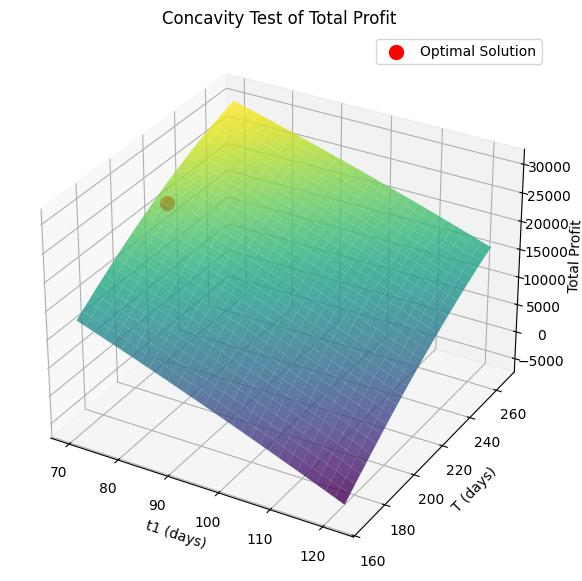

In [41]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# ค่าที่เหมาะสมจากโค้ดแรก
optimal_t1, optimal_T, optimal_p = result.x
optimal_profit = -result.fun  # ค่า TP ที่เหมาะสม

# กำหนดช่วงของ t1 และ T รอบๆ ค่า optimal
t1_values = np.linspace(max(70, optimal_t1 - 50), min(240, optimal_t1 + 50), 30)
T_values = np.linspace(max(90, optimal_T - 50), min(365, optimal_T + 50), 30)
p_fixed = optimal_p  # ใช้ค่าราคา optimal ที่หาได้

# คำนวณค่า total_profit สำหรับแต่ละ (t1, T)
Z = np.zeros((len(t1_values), len(T_values)))

for i, t1 in enumerate(t1_values):
    for j, T in enumerate(T_values):
        if T > t1:  # ต้องเป็นจริงเพื่อให้มีค่าที่ valid
            Z[i, j] = -total_profit([t1, T, p_fixed])  # ทำให้เป็นค่ากำไรจริง

# สร้าง meshgrid สำหรับพล็อต
T1, T2 = np.meshgrid(t1_values, T_values)

# พล็อตกราฟ 3 มิติ
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(T1, T2, Z.T, cmap='viridis', alpha=0.8)

# เพิ่มจุด optimal ที่หาได้
ax.scatter(optimal_t1, optimal_T, optimal_profit, color='red', s=100, label="Optimal Solution")

# ตั้งชื่อแกน
ax.set_xlabel("t1 (days)")
ax.set_ylabel("T (days)")
ax.set_zlabel("Total Profit")
ax.set_title("Concavity Test of Total Profit")

# แสดงค่าจุด optimal
ax.legend()

plt.show()

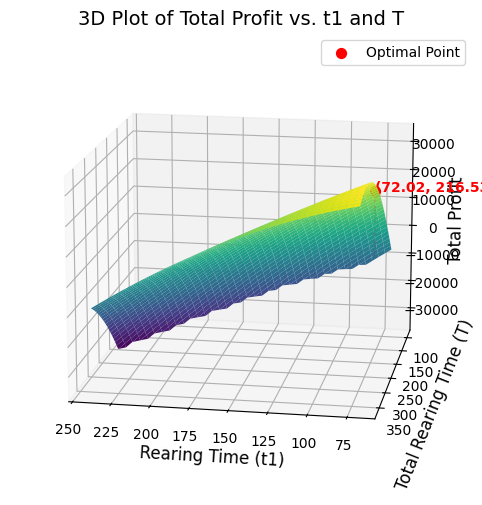

In [49]:
#ลอง
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# ดึงค่าที่เหมาะสมที่สุดจากผลลัพธ์
optimal_t1 = result.x[0]
optimal_T = result.x[1]
optimal_p = result.x[2]
optimal_profit = -result.fun

# สร้างช่วงค่าของ t1 และ T
t1_range = np.linspace(70, 240, 40)
T_range = np.linspace(90, 365, 40)
T1, TT = np.meshgrid(t1_range, T_range)
TP = np.zeros_like(T1)

# คำนวณ Total Profit สำหรับทุกค่า t1 และ T โดยใช้ p คงที่เป็นค่าที่เหมาะสมที่สุด
for i in range(T1.shape[0]):
    for j in range(T1.shape[1]):
        if TT[i, j] < T1[i, j]:  # ต้องเป็น T >= t1
            TP[i, j] = np.nan
        else:
            TP[i, j] = -total_profit([T1[i, j], TT[i, j], optimal_p])

# สร้าง Figure 3D
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

# พล็อตพื้นผิวของ Total Profit
surf = ax.plot_surface(T1, TT, TP, cmap='viridis', edgecolor='none')

# พล็อตจุดที่เหมาะสมที่สุด
ax.scatter(optimal_t1, optimal_T, optimal_profit, color='red', s=50, label='Optimal Point')
ax.plot([optimal_t1, optimal_t1], [optimal_T, optimal_T], [0, optimal_profit], color='red', linestyle='dashed')

# เพิ่มข้อความกำกับที่จุดสูงสุด
ax.text(optimal_t1, optimal_T, optimal_profit,
        f'({optimal_t1:.2f}, {optimal_T:.2f}, {optimal_profit:.2f})',
        color='red', fontsize=10, fontweight='bold')

# ตั้งชื่อแกน
ax.set_xlabel('Rearing Time (t1)', fontsize=12)
ax.set_ylabel('Total Rearing Time (T)', fontsize=12)
ax.set_zlabel('Total Profit', fontsize=12)
ax.set_title('3D Plot of Total Profit vs. t1 and T', fontsize=14)

# ปรับมุมมองเพื่อให้เห็นโครงสร้างกราฟได้ชัดเจน
ax.view_init(elev=15, azim=100)

ax.legend()
plt.show()


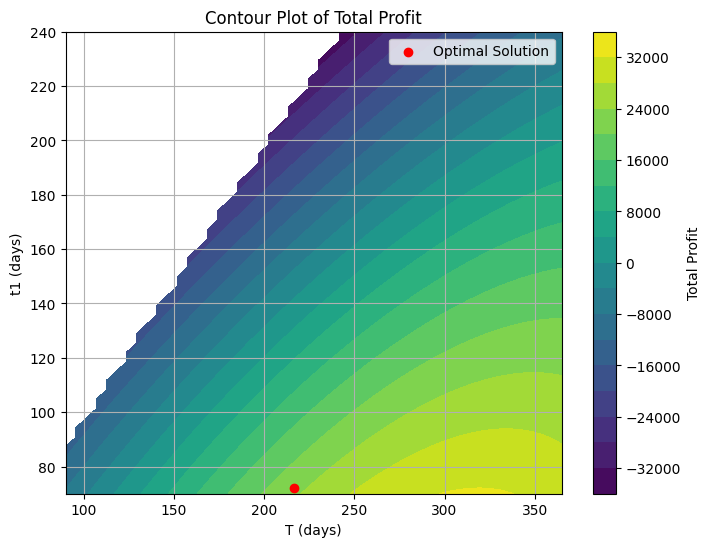

In [42]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from scipy.integrate import quad

# กำหนดค่า optimal จาก minimize
optimal_t1 = result.x[0]  # ค่า t1 ที่หาได้
optimal_T = result.x[1]   # ค่า T ที่หาได้
optimal_p = result.x[2]   # ค่า p ที่หาได้

# สร้างช่วงค่าของ t1 และ T
t1_values = np.linspace(70, 240, 50)  # เพิ่มจำนวนจุดเพื่อความละเอียด
T_values = np.linspace(90, 365, 50)

# คำนวณค่า Total Profit สำหรับแต่ละคู่ค่า (t1, T)
TP_values = np.zeros((len(t1_values), len(T_values)))

for i, t1 in enumerate(t1_values):
    for j, T in enumerate(T_values):
        if T > t1:  # ต้องแน่ใจว่า T ≥ t1
            TP_values[i, j] = -total_profit([t1, T, optimal_p])
        else:
            TP_values[i, j] = np.nan  # ใส่ NaN เพื่อไม่ให้แสดงค่าในจุดที่ผิดเงื่อนไข

# พล็อต Contour Plot
plt.figure(figsize=(8, 6))
contour = plt.contourf(T_values, t1_values, TP_values, levels=20, cmap='viridis')
plt.colorbar(contour, label="Total Profit")

# ทำเครื่องหมายจุด Optimal
plt.scatter(optimal_T, optimal_t1, color='red', marker='o', label="Optimal Solution")

# ตกแต่งกราฟ
plt.xlabel("T (days)")
plt.ylabel("t1 (days)")
plt.title("Contour Plot of Total Profit")
plt.legend()
plt.grid(True)
plt.show()

##Detail

In [43]:
# Optimize
result = minimize(total_profit, initial_guess, bounds=bounds, constraints=constraints, method='SLSQP')

# Extract optimized parameters
t1_opt, T_opt, p_opt = result.x

# Calculate total cost components
PC = Cp * y * W0  # Purchase cost
FC1 = Cf * quad(lambda t: feeding_function(t) * I1(t), 0, t1_opt)[0]
FC2 = Cf * quad(lambda t: feeding_function(t) * I2(t, p_opt, T_opt), t1_opt, T_opt)[0]
HC1 = Ch * quad(lambda t: I1(t), 0, t1_opt)[0]
HC2 = Ch * quad(lambda t: I2(t, p_opt, T_opt), t1_opt, T_opt)[0]
MC1 = theta * Cm * quad(lambda t: I1(t), 0, t1_opt)[0]
MC2 = theta * Cm * quad(lambda t: I2(t, p_opt, T_opt), t1_opt, T_opt)[0]

# Calculate total cost, revenue, and profit
TC = PC + FC1 + HC1 + MC1 + FC2 + HC2 + MC2 + CC
TR = total_revenue(t1_opt, T_opt, p_opt)
TP = TR - TC

# Display results
print("Optimal Parameters:")
print(f"t1 (Rearing period): {t1_opt:.2f}")
print(f"T (Selling time): {T_opt:.2f}")
print(f"p (Price per unit): {p_opt:.4f}")
print("\nCost Breakdown:")
print(f"  Purchase Cost (PC): {PC:.2f}")
print(f"  Feeding Cost (FC1): {FC1:.2f}")
print(f"  Feeding Cost (FC2): {FC2:.2f}")
print(f"  Holding Cost (HC1): {HC1:.2f}")
print(f"  Holding Cost (HC2): {HC2:.2f}")
print(f"  Mortality Cost (MC1): {MC1:.2f}")
print(f"  Mortality Cost (MC2): {MC2:.2f}")
print(f"  Constant Cost (CC): {CC:.2f}")
print(f"\nTotal Cost (TC): {TC:.2f}")
print(f"Total Revenue (TR): {TR:.2f}")
print(f"Total Profit (TP): {TP:.2f}")

Optimal Parameters:
t1 (Rearing period): 72.02
T (Selling time): 216.53
p (Price per unit): 0.0548

Cost Breakdown:
  Purchase Cost (PC): 7920.00
  Feeding Cost (FC1): 2095.97
  Feeding Cost (FC2): 2893.79
  Holding Cost (HC1): 808.94
  Holding Cost (HC2): 1929.19
  Mortality Cost (MC1): 2.83
  Mortality Cost (MC2): 6.75
  Constant Cost (CC): 2300.00

Total Cost (TC): 17957.46
Total Revenue (TR): 40741.18
Total Profit (TP): 22783.72


##กราฟ I(t) ของ Optimal

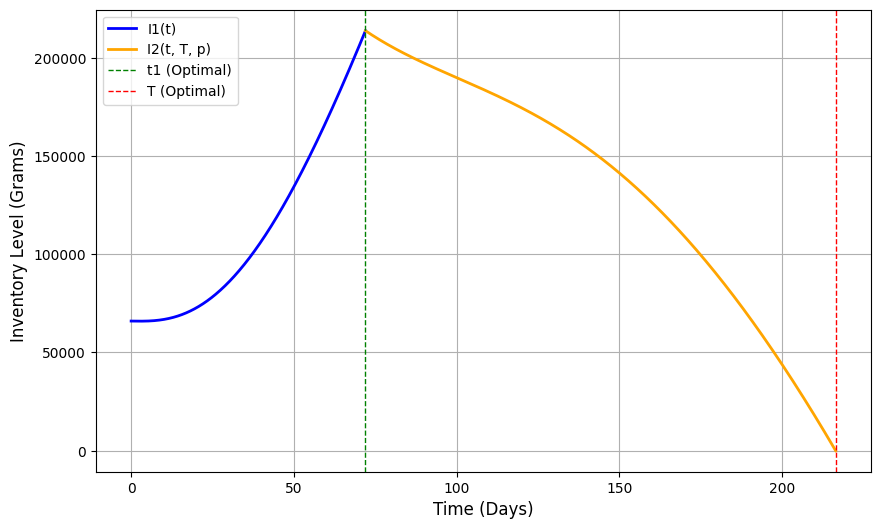

In [44]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad

# ค่าพารามิเตอร์จาก optimal solution
optimal_t1 = result.x[0]
optimal_T = result.x[1]
optimal_p = result.x[2]

# สร้างช่วงเวลา t สำหรับกราฟ
t_range_I1 = np.linspace(0, optimal_t1, 500)  # ช่วงเวลา t สำหรับ I1(t)
t_range_I2 = np.linspace(optimal_t1, optimal_T, 500)  # ช่วงเวลา t สำหรับ I2(t)

# คำนวณค่า I1 และ I2
I1_values = [I1(t) for t in t_range_I1]
I2_values = [I2(t,optimal_p ,optimal_T ) for t in t_range_I2]

# สร้างกราฟ
plt.figure(figsize=(10, 6))
plt.plot(t_range_I1, I1_values, label='I1(t)', color='blue', linewidth=2)
plt.plot(t_range_I2, I2_values, label='I2(t, T, p)', color='orange', linewidth=2)
plt.axvline(x=optimal_t1, color='green', linestyle='--', label='t1 (Optimal)', linewidth=1)
plt.axvline(x=optimal_T, color='red', linestyle='--', label='T (Optimal)', linewidth=1)

# กำหนดรายละเอียดกราฟ
plt.xlabel('Time (Days)', fontsize=12)
plt.ylabel('Inventory Level (Grams)', fontsize=12)
plt.legend(fontsize=10)
plt.grid(True)
plt.show()

#ทดสอบความไว

## p, y และ theta ที่มีต่อ t1, T และ TP*

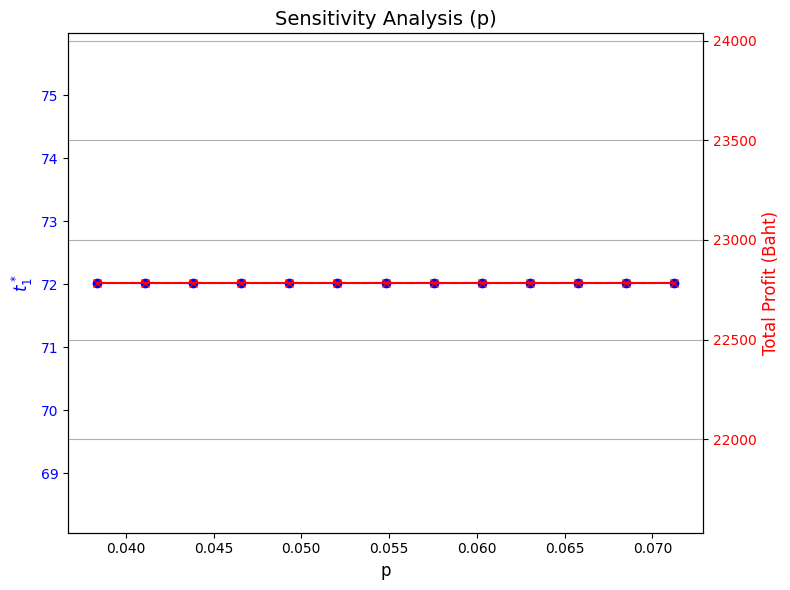

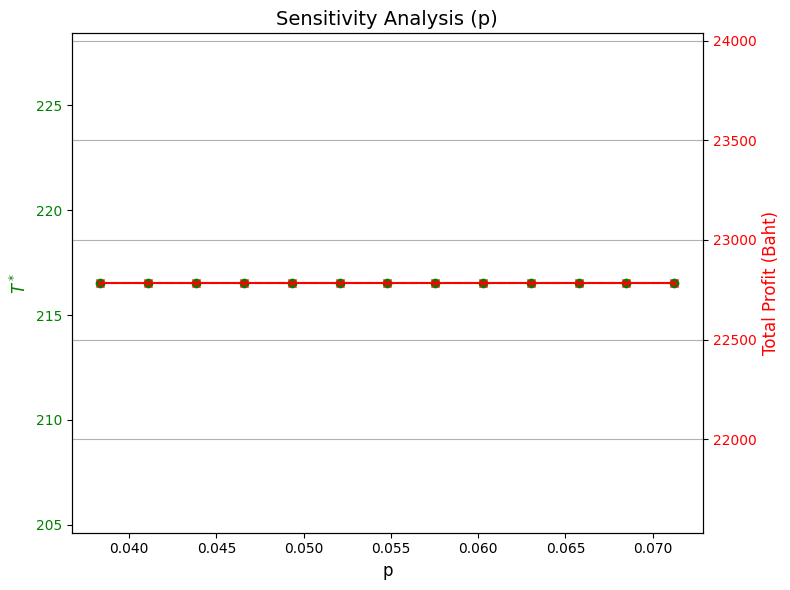

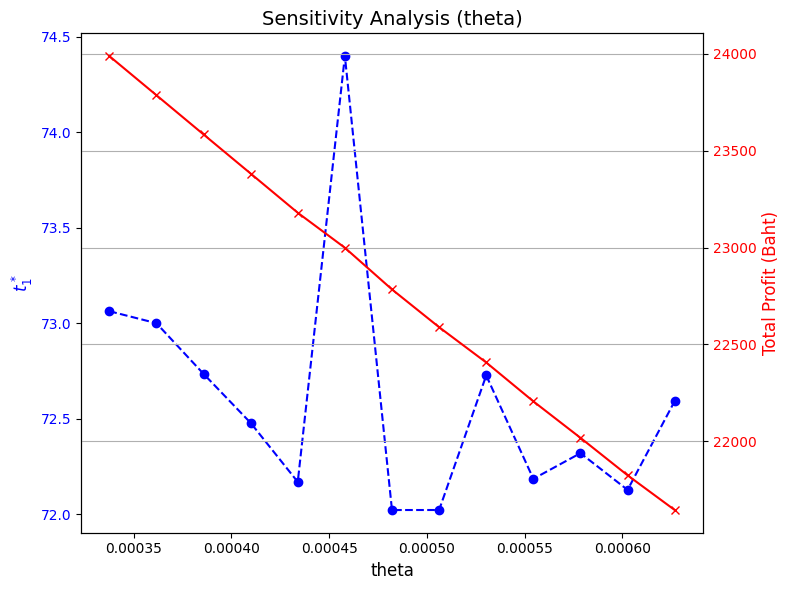

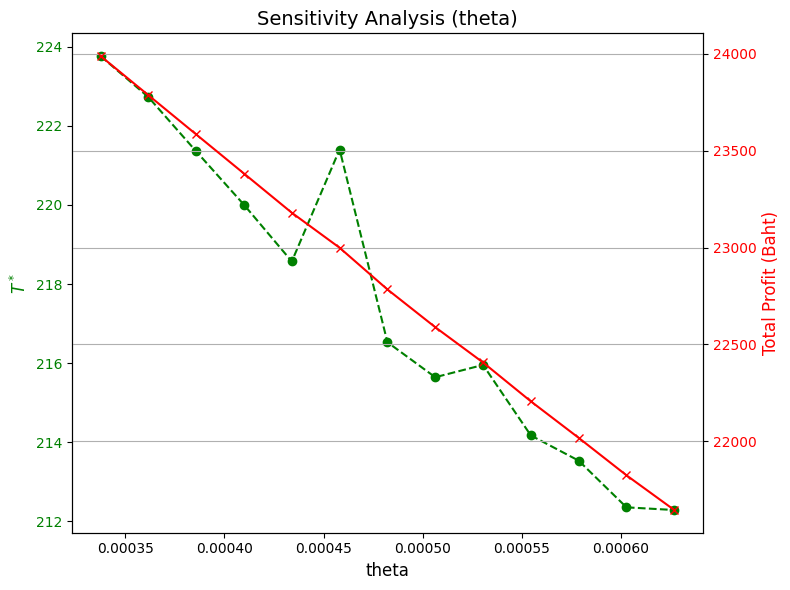

In [45]:
# ฟังก์ชันวิเคราะห์ความไว
def sensitivity_analysis(param_name, param_range, optimal_params):
    t1_opt, T_opt, p_opt = optimal_params
    results = []

    for param in param_range:
        globals()[param_name] = param  # ปรับค่าพารามิเตอร์
        # หา optimal ใหม่สำหรับ t1, T, p
        result = minimize(total_profit, [t1_opt, T_opt, p_opt], bounds=bounds, constraints=constraints, method='SLSQP')
        t1_new, T_new, p_new = result.x
        total_profit_opt = -result.fun  # ค่า TP*
        results.append((param, t1_new, T_new, total_profit_opt))

    return results

# การพล็อตกราฟสำหรับ t1* หรือ T* กับ TP*
def plot_sensitivity(results, param_name, plot_type='t1'):
    params = [x[0] for x in results]
    t1_values = [x[1] for x in results]
    T_values = [x[2] for x in results]
    total_profit_values = [x[3] for x in results]

    plt.figure(figsize=(8, 6))
    plt.xlabel(param_name, fontsize=12)

    # กำหนดแกน y ด้านซ้าย
    ax1 = plt.gca()  # แกนหลัก
    if plot_type == 't1':
        ax1.plot(params, t1_values, marker='o', linestyle='--', color='blue', label='$t_1^*$')
        ax1.set_ylabel('$t_1^*$', fontsize=12, color='blue')
        ax1.tick_params(axis='y', labelcolor='blue')
    elif plot_type == 'T':
        ax1.plot(params, T_values, marker='o', linestyle='--', color='green', label='$T^*$')
        ax1.set_ylabel('$T^*$', fontsize=12, color='green')
        ax1.tick_params(axis='y', labelcolor='green')

    # เพิ่มแกน y ด้านขวา สำหรับกำไรรวม (Total Profit)
    ax2 = ax1.twinx()  # สร้างแกน y ด้านขวา
    ax2.plot(params, total_profit_values, marker='x', linestyle='-', color='red', label='Total Profit')
    ax2.set_ylabel('Total Profit (Baht)', fontsize=12, color='red')
    ax2.tick_params(axis='y', labelcolor='red')

    plt.title(f'Sensitivity Analysis ({param_name})', fontsize=14)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# ช่วงของพารามิเตอร์สำหรับวิเคราะห์ความไว
sensitivity_range = np.linspace(0.7, 1.3, 13)

# วิเคราะห์ความไว
params_to_analyze = ['p', 'theta']  # ตัวแปรที่ต้องการวิเคราะห์
for param in params_to_analyze:
    param_range = globals()[param] * sensitivity_range  # ช่วงค่าพารามิเตอร์
    results = sensitivity_analysis(param, param_range, [optimal_t1, optimal_T, optimal_p])

    # พล็อต t1* และ TP*
    plot_sensitivity(results, param, plot_type='t1')
    # พล็อต T* และ TP*
    plot_sensitivity(results, param, plot_type='T')

#กราฟทดสอบความไว

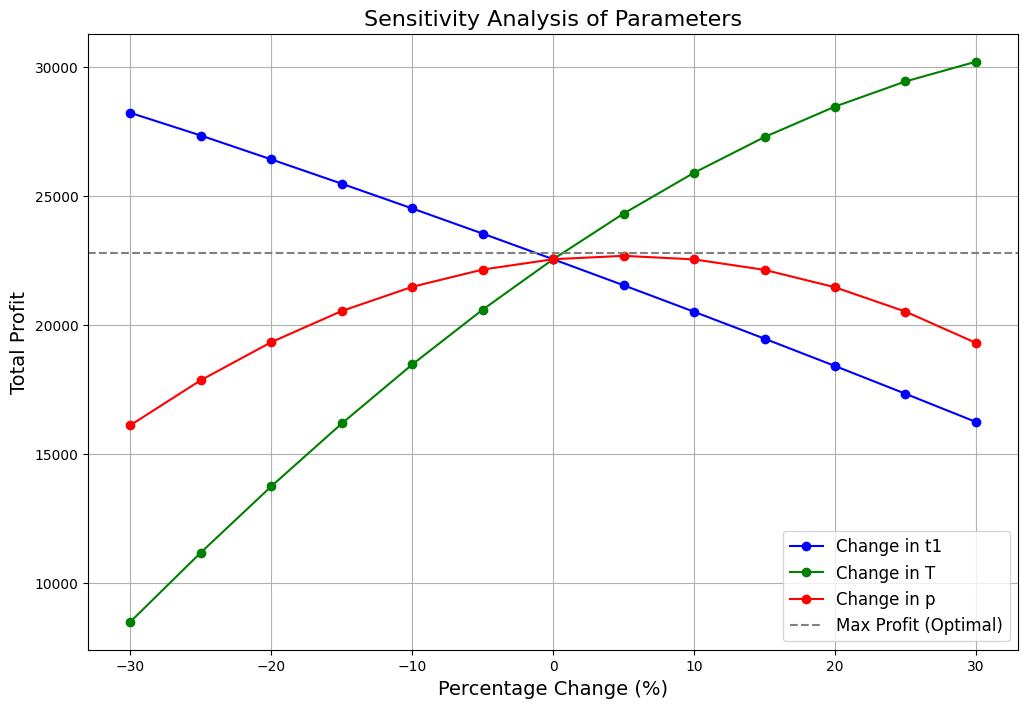

In [46]:
import matplotlib.pyplot as plt
import numpy as np

# ดึงค่าที่ได้จากการ optimize
optimal_t1 = result.x[0]
optimal_T = result.x[1]
optimal_p = result.x[2]
max_profit = -result.fun

# ตัวอย่างข้อมูลสำหรับพลอตความสัมพันธ์
percentage_changes = np.arange(-30, 35, 5)  # เปอร์เซ็นต์การเปลี่ยนแปลง
profits_t1 = []  # กำไรเมื่อเปลี่ยน t1
profits_T = []   # กำไรเมื่อเปลี่ยน T
profits_p = []   # กำไรเมื่อเปลี่ยน p

# พลอตการเปลี่ยนแปลงพารามิเตอร์ t1
for change in percentage_changes:
    t1 = optimal_t1 * (1 + change / 100)  # เปลี่ยน t1 เป็นเปอร์เซ็นต์
    params = [t1, optimal_T, optimal_p]
    profit = -total_profit(params)  # คำนวณกำไร
    profits_t1.append(profit)

# พลอตการเปลี่ยนแปลงพารามิเตอร์ T
for change in percentage_changes:
    T = optimal_T * (1 + change / 100)  # เปลี่ยน T เป็นเปอร์เซ็นต์
    params = [optimal_t1, T, optimal_p]
    profit = -total_profit(params)  # คำนวณกำไร
    profits_T.append(profit)

# พลอตการเปลี่ยนแปลงพารามิเตอร์ p
for change in percentage_changes:
    p = optimal_p * (1 + change / 100)  # เปลี่ยน p เป็นเปอร์เซ็นต์
    params = [optimal_t1, optimal_T, p]
    profit = -total_profit(params)  # คำนวณกำไร
    profits_p.append(profit)

# สร้างกราฟ
plt.figure(figsize=(12, 8))

# พลอตผลลัพธ์ของ t1
plt.plot(percentage_changes, profits_t1, '-o', label='Change in t1', color='blue')

# พลอตผลลัพธ์ของ T
plt.plot(percentage_changes, profits_T, '-o', label='Change in T', color='green')

# พลอตผลลัพธ์ของ p
plt.plot(percentage_changes, profits_p, '-o', label='Change in p', color='red')

# การตั้งค่ากราฟ
plt.axhline(y=max_profit, color='gray', linestyle='--', label='Max Profit (Optimal)')
plt.xlabel('Percentage Change (%)', fontsize=14)
plt.ylabel('Total Profit', fontsize=14)
plt.title('Sensitivity Analysis of Parameters', fontsize=16)
plt.legend(fontsize=12)
plt.grid(True)
plt.show()

##W

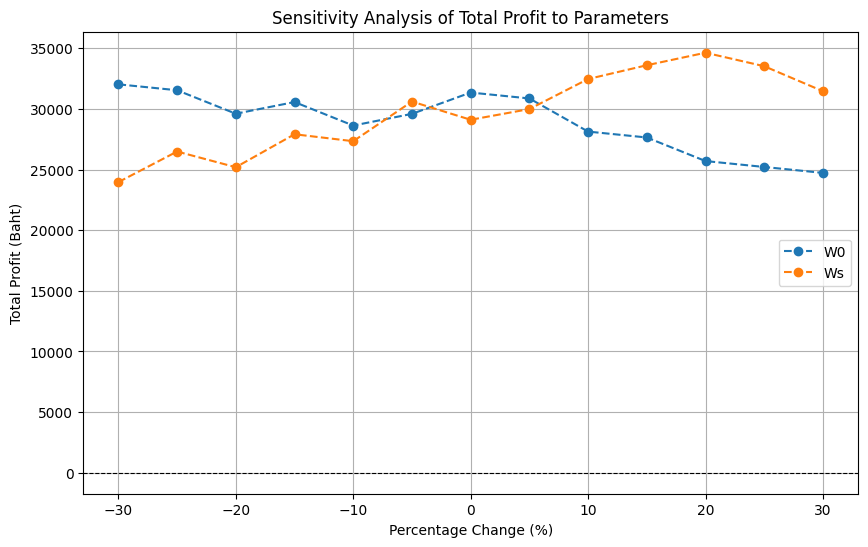

In [47]:
def sensitivity_analysis_profit(param_list, sensitivity_range, optimal_params):
    t1_opt, T_opt, p_opt = optimal_params
    results = {param: [] for param in param_list}

    # สำเนาค่าพารามิเตอร์เริ่มต้น
    global_params = {param: globals()[param] for param in param_list}

    for param in param_list:
        base_value = global_params[param]  # เก็บค่าพารามิเตอร์เดิม
        for factor in sensitivity_range:
            globals()[param] = base_value * factor  # เปลี่ยนแปลงค่าพารามิเตอร์
            # คำนวณกำไรทั้งหมด (Total Profit)
            result = minimize(total_profit, [t1_opt, T_opt, p_opt], bounds=bounds, method='SLSQP')
            profit_optimal = -result.fun  # เปลี่ยนค่าเป็นบวกสำหรับกำไร
            results[param].append(profit_optimal)
        globals()[param] = base_value  # คืนค่าพารามิเตอร์กลับสู่ค่าเดิม
    return results

def plot_sensitivity_profit(results, sensitivity_range):
    plt.figure(figsize=(10, 6))
    percent_changes = (sensitivity_range - 1) * 100

    for param, profit_values in results.items():
        plt.plot(percent_changes, profit_values, label=f"{param}", marker='o', linestyle='--')

    plt.axhline(y=0, color='black', linewidth=0.8, linestyle='--')
    plt.xlabel("Percentage Change (%)")
    plt.ylabel("Total Profit (Baht)")
    plt.title("Sensitivity Analysis of Total Profit to Parameters")
    plt.legend()
    plt.grid(True)
    plt.show()

# การวิเคราะห์ตัวแปร W0 และ Ws สำหรับ Total Profit
param_list_profit = ['W0', 'Ws']  # ตัวแปรที่ต้องการวิเคราะห์
sensitivity_range = np.arange(0.7, 1.31, 0.05)  # ช่วงการเปลี่ยนแปลง 70% ถึง 130%
optimal_params = result.x  # ค่าที่เหมาะสมที่สุดจากการคำนวณก่อนหน้า

# รันการวิเคราะห์และแสดงผลลัพธ์
results_profit = sensitivity_analysis_profit(param_list_profit, sensitivity_range, optimal_params)
plot_sensitivity_profit(results_profit, sensitivity_range)

##Cost

In [48]:
import matplotlib.pyplot as plt
import numpy as np

# ฟังก์ชันคำนวณ Total Profit ใหม่
def calculate_total_profit_with_C_variation(C_param_name, variation_range):
    profits = []
    for change in variation_range:
        # ปรับค่าของ C
        globals()[C_param_name] = globals()[C_param_name] * (1 + change / 100)
        # คำนวณ TP ใหม่
        TP = -total_profit(result.x)  # ใช้ค่าที่เหมาะสมที่สุดจาก Optimization
        profits.append(TP)
        # คืนค่า C เดิม
        globals()[C_param_name] = globals()[C_param_name] / (1 + change / 100)
    return profits

# ช่วงของเปอร์เซ็นต์การเปลี่ยนแปลง
variation_range = np.arange(-30, 35, 5)

# รายชื่อพารามิเตอร์ที่ต้องการวิเคราะห์

# สร้างกราฟเดียวกันสำหรับทุกพารามิเตอร์
plt.figure(figsize=(10, 6))

all_profits = []  # เก็บค่า Total Profit ทั้งหมดเพื่อปรับสเกล

for C_param in C_params:
    profits = calculate_total_profit_with_C_variation(C_param, variation_range)
    all_profits.extend(profits)  # รวมค่าทั้งหมด
    plt.plot(variation_range, profits, marker='o', label=f"Impact of {C_param}")

# การตั้งค่ากราฟ
plt.title("Sensitivity Analysis of Total Profit by C Parameters")
plt.xlabel("Change in C (%)")
plt.ylabel("Total Profit (Baht)")
plt.axhline(0, color='gray', linestyle='--', linewidth=0.8)  # เส้น TP = 0
plt.legend()
plt.grid()

# ปรับสเกลให้เหมาะสม
min_profit = min(all_profits)  # ค่าต่ำสุดของ Total Profit
max_profit = max(all_profits)  # ค่าสูงสุดของ Total Profit
margin = 0.1 * (max_profit - min_profit)  # เพิ่ม margin 10%
plt.ylim(min_profit - margin, max_profit + margin)  # กำหนดช่วงแกน y

plt.show()

NameError: name 'C_params' is not defined

<Figure size 1000x600 with 0 Axes>

##D

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# ค่าเริ่มต้น
d_base = 11927.16
f_base = 123768.45
d_values = np.linspace(0.7 * d_base, 1.3 * d_base, 50)  # ±30% ของ d
f_values = np.linspace(0.7 * f_base, 1.3 * f_base, 50)  # ±30% ของ f

# เก็บผลลัพธ์
tp_results_d = []  # เก็บผล Total Profit เมื่อ d เปลี่ยน
tp_results_f = []  # เก็บผล Total Profit เมื่อ f เปลี่ยน

# วิเคราะห์ผลกระทบของ d
for d in d_values:
    def total_revenue(t1, T, p):
        Dp = d - f_base * p
        return Dp * (T - t1) * p

    result = minimize(total_profit, initial_guess, bounds=bounds, constraints=constraints, method='SLSQP')
    tp_results_d.append({'change': ((d - d_base) / d_base) * 100, 'TP': -result.fun})

# วิเคราะห์ผลกระทบของ f
for f in f_values:
    def total_revenue(t1, T, p):
        Dp = d_base - f * p
        return Dp * (T - t1) * p

    result = minimize(total_profit, initial_guess, bounds=bounds, constraints=constraints, method='SLSQP')
    tp_results_f.append({'change': ((f - f_base) / f_base) * 100, 'TP': -result.fun})

# แปลงผลลัพธ์เป็น numpy array สำหรับกราฟ
tp_results_d = np.array([[r['change'], r['TP']] for r in tp_results_d])
tp_results_f = np.array([[r['change'], r['TP']] for r in tp_results_f])

# สร้างกราฟ Total Profit (TP) เทียบกับ % การเปลี่ยนแปลง
plt.figure(figsize=(10, 6))
plt.plot(tp_results_d[:, 0], tp_results_d[:, 1], label="Effect of d", color='blue')
plt.plot(tp_results_f[:, 0], tp_results_f[:, 1], label="Effect of f", color='orange')
plt.axvline(0, color='gray', linestyle='--')  # เส้นแสดงจุดฐาน (0%)
plt.xlabel('% Change')
plt.ylabel('Total Profit (TP)')
plt.title('Sensitivity Analysis of Total Profit vs % Change in d and f')
plt.legend()
plt.grid()
plt.show()

##ตาราง

In [ ]:
import numpy as np
import pandas as pd
from scipy.optimize import minimize
from scipy.integrate import quad

# Feeding function
def feeding_function(t):
    return 4/100 if t <= 28 else 3/100 if t <= 52 else 1.5/100

# I1(t) function
def I1_test(t, W0, Ws, theta, K, t0, y):
    term1 = y * Ws * np.exp(-theta * t) * (-3 * np.exp(-K * (t - t0)) + 3 * np.exp(-2 * K * (t - t0)) - np.exp(-3 * K * (t - t0)))
    term2 = y * (W0 + 3 * Ws * np.exp(K * t0) - 3 * Ws * np.exp(2 * K * t0) + Ws * np.exp(3 * K * t0)) * np.exp(-theta * t)
    return term1 + term2

# I2(t) function
def I2_test(t, T, Ws, theta, Dp, K, t0, y):
    term1 = y * Ws * np.exp(-theta * t) * (-3 * np.exp(-K * (t - t0)) + 3 * np.exp(-2 * K * (t - t0)) - np.exp(-3 * K * (t - t0)))
    term2 = -Dp / theta
    term3 = y * Ws * np.exp(-theta * t) * (3 * np.exp(-K * (T - t0)) - 3 * np.exp(-2 * K * (T - t0)) + np.exp(-3 * K * (T - t0)))
    term4 = (Dp / theta) * np.exp(theta * (T - t))
    return term1 + term2 + term3 + term4

# Total cost function
def total_cost(params):
    t1, T, p = params
    Dp = d - f * p

    PC = Cp * y * W0

    FC1 = Cf * (quad(lambda t: 4/100 * I1_test(t, W0, Ws, theta, K, t0, y), 0, 28)[0] +
                quad(lambda t: 3/100 * I1_test(t, W0, Ws, theta, K, t0, y), 28, 52)[0] +
                quad(lambda t: 1.5/100 * I1_test(t, W0, Ws, theta, K, t0, y), 52, t1)[0])
    FC2 = Cf * quad(lambda t: feeding_function(t) * I2_test(t, T, Ws, theta, Dp, K, t0, y), t1, T)[0]

    HC1 = Ch * quad(lambda t: I1_test(t, W0, Ws, theta, K, t0, y), 0, t1)[0]
    HC2 = Ch * quad(lambda t: I2_test(t, T, Ws, theta, Dp, K, t0, y), t1, T)[0]

    MC1 = theta * Cm * quad(lambda t: I1_test(t, W0, Ws, theta, K, t0, y), 0, t1)[0]
    MC2 = theta * Cm * quad(lambda t: I2_test(t, T, Ws, theta, Dp, K, t0, y), t1, T)[0]

    return PC + FC1 + HC1 + MC1 + FC2 + HC2 + MC2 + CC

# Total revenue function
def total_revenue(params):
    t1, T, p = params
    Dp = d - f * p
    return Dp * (T - t1) * p

# Total profit function (to maximize)
def total_profit(params):
    return -(total_revenue(params) - total_cost(params))

# Sensitivity analysis function
def sensitivity_analysis(param_name, param_value, range_values):
    results = []
    for r in range_values:
        adjusted_value = param_value * r
        globals()[param_name] = adjusted_value
        result = minimize(total_profit, initial_guess, bounds=bounds, constraints=constraints, method='SLSQP')
        results.append({
            'Change (%)': f"{(r - 1) * 100:.0f}%",
            param_name: adjusted_value,
            't1*': result.x[0],
            'T*': result.x[1],
            'p*': result.x[2],
            'Total Profit': -result.fun
        })
    return pd.DataFrame(results)

# Sensitivity ranges
sensitivity_range = np.arange(0.7, 1.31, 0.05)

# Run sensitivity analysis
results_W0 = sensitivity_analysis('W0', W0, sensitivity_range)
results_Ws = sensitivity_analysis('Ws', Ws, sensitivity_range)
results_theta = sensitivity_analysis('theta', theta, sensitivity_range)

# Display results
print("Sensitivity Analysis for W0:")
print(results_W0.to_string(index=False))

print("\nSensitivity Analysis for Ws:")
print(results_Ws.to_string(index=False))

print("\nSensitivity Analysis for θ:")
print(results_theta.to_string(index=False))

#concavity test

##กราฟ TP & t1

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# สร้างช่วงของ t1
t1_range = np.linspace(0, 160, 20)  # ช่วงเวลา t1 จาก 0 ถึง 365 (ปรับได้ตามความเหมาะสม)

# ฟังก์ชันคำนวณ Total Profit ตาม t1
def calculate_tp_over_time(t1_range, fixed_T, fixed_p):
    tp_values = []
    for t1 in t1_range:
        # ใช้ค่าคงที่ T และ p พร้อม t1 ที่เปลี่ยนไป
        params = [t1, fixed_T, fixed_p]
        tp = -total_profit(params)  # คำนวณ TP (ใช้ - เพราะ total_profit เป็นฟังก์ชันที่ต้อง minimize)
        tp_values.append(tp)
    return tp_values

# ค่าคงที่จากผลการ Optimize
fixed_T = result.x[1]  # ค่า T ที่ได้จาก Optimize
fixed_p = result.x[2]  # ค่า p ที่ได้จาก Optimize

# คำนวณ Total Profit ตาม t1
tp_values = calculate_tp_over_time(t1_range, fixed_T, fixed_p)

# สร้างกราฟ TP vs t1
plt.figure(figsize=(8, 5))
plt.plot(t1_range, tp_values, label="Total Profit", color="blue")
plt.title("Total Profit (TP) Over Time (t1)")
plt.xlabel("Time (t1)")
plt.ylabel("Total Profit (TP)")
plt.axhline(0, color="gray", linestyle="--", linewidth=0.8, label="Zero Profit Line")  # เส้นกำไร 0
plt.grid()
plt.legend()
plt.show()

##กราฟ TP & T

In [ ]:
# สร้างช่วงของ T
T_range = np.linspace(150, 520, 50)  # กำหนดช่วง T ตั้งแต่ 240 ถึง 365 (ปรับได้ตามต้องการ)

# ฟังก์ชันคำนวณ Total Profit ตาม T
def calculate_tp_over_T(T_range, fixed_t1, fixed_p):
    tp_values = []
    for T in T_range:
        # ใช้ค่าคงที่ t1 และ p พร้อม T ที่เปลี่ยนไป
        params = [fixed_t1, T, fixed_p]
        tp = -total_profit(params)  # คำนวณ TP
        tp_values.append(tp)
    return tp_values

# ค่าคงที่จากผลการ Optimize
fixed_t1 = result.x[0]  # ค่า t1 จาก Optimize
fixed_p = result.x[2]   # ค่า p จาก Optimize

# คำนวณ Total Profit ตาม T
tp_values_T = calculate_tp_over_T(T_range, fixed_t1, fixed_p)

# สร้างกราฟ TP vs T
plt.figure(figsize=(8, 5))
plt.plot(T_range, tp_values_T, label="Total Profit", color="green")
plt.title("Total Profit (TP) Over Time (T)")
plt.xlabel("Time (T)")
plt.ylabel("Total Profit (TP)")
plt.axhline(0, color="gray", linestyle="--", linewidth=0.8, label="Zero Profit Line")  # เส้นกำไร 0
plt.grid()
plt.legend()
plt.show()

#กราฟ 3D concave

###กราฟจำลองเว้า

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# สร้างกริดของค่า t1 และ T
t1_vals = np.linspace(-150, 150, 50)
T_vals = np.linspace(0, 365, 50)  # สมมติช่วง T
t1_grid, T_grid = np.meshgrid(t1_vals, T_vals)

# กำหนดค่า p คงที่
p_fixed = 0.0548

# คำนวณ Total Profit สำหรับแต่ละคู่ค่า (t1, T)
TP_vals = np.zeros_like(t1_grid)

for i in range(t1_grid.shape[0]):
    for j in range(t1_grid.shape[1]):
        t1 = t1_grid[i, j]
        T = T_grid[i, j]
        TP_vals[i, j] = -total_profit([t1, T, p_fixed])  # กำไรต้องเป็นค่าบวก

# สร้างกราฟ 3D
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
surface = ax.plot_surface(t1_grid, T_grid, TP_vals, cmap='viridis', edgecolor='none')

# เพิ่ม color bar
cbar = fig.colorbar(surface, ax=ax, shrink=0.5, aspect=10)
cbar.set_label('Total Profit', fontsize=12)

ax.set_xlabel('Selling Period (T)' ,labelpad=10, fontproperties='Serif', fontsize=10)
ax.set_ylabel('Rearing Period (t1)', labelpad=10, fontproperties='Serif', fontsize=10)
ax.set_zlabel('Total Cost', labelpad=10, fontproperties='Serif', fontsize=10)
ax.zaxis.label.set_position((-0.1, 0.5, 0))
# ปรับแต่งกราฟ
ax.set_title('3D Concave Plot of Total Profit', fontsize=16)
ax.set_xlabel('Rearing Time (t1)', fontsize=12)
ax.set_ylabel('Time of Sale (T)', fontsize=12)
ax.set_zlabel('Total Profit', fontsize=12)
ax.zaxis.label.set_position((-0.1, 0.5, 0))
ax.view_init(elev=10, azim=-104)
plt.show()

###กราฟที่ใช้

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# สร้างกริดของค่า t1 และ T
t1_vals = np.linspace(70, 80, 50)
T_vals = np.linspace(200, 230, 50)  # สมมติช่วง T
t1_grid, T_grid = np.meshgrid(t1_vals, T_vals)

# กำหนดค่า p คงที่
p_fixed = 0.05479

# คำนวณ Total Profit สำหรับแต่ละคู่ค่า (t1, T)
TP_vals = np.zeros_like(t1_grid)

for i in range(t1_grid.shape[0]):
    for j in range(t1_grid.shape[1]):
        t1 = t1_grid[i, j]
        T = T_grid[i, j]
        TP_vals[i, j] = -total_profit([t1, T, p_fixed])  # กำไรต้องเป็นค่าบวก

# สร้างกราฟ 3D
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
surface = ax.plot_surface(t1_grid, T_grid, TP_vals, cmap='viridis', edgecolor='none')

# เพิ่ม color bar
cbar = fig.colorbar(surface, ax=ax, shrink=0.5, aspect=10)
cbar.set_label('Total Profit', fontsize=12)

ax.set_xlabel('Selling Period (T)' ,labelpad=10, fontproperties='Serif', fontsize=10)
ax.set_ylabel('Rearing Period (t1)', labelpad=10, fontproperties='Serif', fontsize=10)
ax.set_zlabel('Total Cost', labelpad=10, fontproperties='Serif', fontsize=10)
ax.zaxis.label.set_position((-0.1, 0.5, 0))
# ปรับแต่งกราฟ
ax.set_title('3D Concave Plot of Total Profit', fontsize=16)
ax.set_xlabel('Rearing Time (t1)', fontsize=12)
ax.set_ylabel('Time of Sale (T)', fontsize=12)
ax.set_zlabel('Total Profit', fontsize=12)
ax.zaxis.label.set_position((-0.1, 0.5, 0))
ax.view_init(elev=10, azim=-104)
plt.show()

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# สร้างช่วงของ t1 และ T
t1_range = np.linspace(70, 120, 100)  # ช่วง t1
T_range = np.linspace(100, 365, 100)  # ช่วง T

# สร้าง meshgrid สำหรับ t1 และ T
t1_grid, T_grid = np.meshgrid(t1_range, T_range)

# ฟังก์ชันคำนวณ TP สำหรับคู่ค่า (t1, T)
def calculate_tp(t1, T, fixed_p):
    if T >= t1:
        return -total_profit([t1, T, fixed_p])
    else:
        return np.nan  # ค่า NaN สำหรับข้อจำกัด T < t1

# ค่าคงที่ p จากผลการ Optimize
fixed_p = result.x[2]  # ค่า p ที่ได้จาก Optimize

# ใช้ np.vectorize เพื่อคำนวณ TP บนกริด
calculate_tp_vec = np.vectorize(calculate_tp)
TP_grid = calculate_tp_vec(t1_grid, T_grid, fixed_p)

# พล็อตกราฟสามมิติ
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# สร้าง surface plot
surf = ax.plot_surface(t1_grid, T_grid, TP_grid, cmap='viridis', edgecolor='none')

# ตั้งค่ากราฟ
ax.set_title("3D Plot of Total Profit (TP) vs t1 and T")
ax.set_xlabel("t1 (Time)")
ax.set_ylabel("T (Time)")
ax.set_zlabel("Total Profit (TP)")
ax.view_init(elev=20, azim=-130)

# เพิ่ม color bar
fig.colorbar(surf, shrink=0.5, aspect=10)

plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.optimize import minimize
from scipy.integrate import quad

# กำหนดค่าคงที่
Ws = 500
W0 = 33
t0 = -0.33296
K = 0.0106590783486797
theta = 0.00048219  # จาก 16.17% -> 0.176/365 วัน
y = 2000         # ตัวอย่างค่าของ y
Cp = 0.12
Cf = 0.01
Ch = 0.0001
Cm = 0.0007252
CC = 2300
d = 11927.16
f = 123768.45

# ฟังก์ชันสำหรับการให้อาหาร
def feeding_function(t):
    if t <= 28:
        return 4 / 100
    elif t <= 52:
        return 3 / 100
    else:
        return 1.5 / 100

# ฟังก์ชัน I1(t)
def I1(t):
    term1 = y * Ws * np.exp(-theta * t) * (
        -3 * np.exp(-K * (t - t0)) + 3 * np.exp(-2 * K * (t - t0)) - np.exp(-3 * K * (t - t0))
    )
    term2 = y * (W0 + 3 * Ws * np.exp(K * t0) - 3 * Ws * np.exp(2 * K * t0) + Ws * np.exp(3 * K * t0)) * np.exp(-theta * t)
    return term1 + term2

# ฟังก์ชัน I2(t, p, T)
def I2(t, p, T):
    Dp = d - f * p
    term1 = y * Ws * np.exp(-theta * t) * (
        -3 * np.exp(-K * (t - t0)) + 3 * np.exp(-2 * K * (t - t0)) - np.exp(-3 * K * (t - t0))
    )
    term2 = - Dp / theta
    term3 = y * Ws * np.exp(-theta * t) * (
        3 * np.exp(-K * (T - t0)) - 3 * np.exp(-2 * K * (T - t0)) + np.exp(-3 * K * (T - t0))
    )
    term4 = (Dp / theta) * np.exp(theta * (T - t))
    return term1 + term2 + term3 + term4

# ฟังก์ชันการอินทิเกรตที่ปลอดภัย
def safe_integrate(func, a, b):
    try:
        return quad(func, a, b, limit=100)[0]
    except:
        mid = (a + b) / 2
        return safe_integrate(func, a, mid) + safe_integrate(func, mid, b)

# ฟังก์ชันคำนวณต้นทุนรวม (TC)
def total_cost(t1, T, p):
    PC = Cp * y * W0  # ต้นทุนการซื้อ
    FC1 = Cf * safe_integrate(lambda t: feeding_function(t) * I1(t), 0, t1)
    FC2 = Cf * safe_integrate(lambda t: feeding_function(t) * I2(t, p, T), t1, T)
    HC1 = Ch * safe_integrate(lambda t: I1(t), 0, t1)
    HC2 = Ch * safe_integrate(lambda t: I2(t, p, T), t1, T)
    MC1 = theta * Cm * safe_integrate(lambda t: I1(t), 0, t1)
    MC2 = theta * Cm * safe_integrate(lambda t: I2(t, p, T), t1, T)
    return PC + FC1 + HC1 + MC1 + FC2 + HC2 + MC2 + CC

# ฟังก์ชันคำนวณรายได้รวม (TR)
def total_revenue(t1, T, p):
    Dp = d - f * p
    return Dp * (T - t1) * p

# ฟังก์ชันกำไรสุทธิ (TP) โดยคืนค่าเป็นลบของกำไรเพื่อใช้ในการ minimize
def total_profit(params):
    t1, T, p = params
    TR = total_revenue(t1, T, p)
    TC = total_cost(t1, T, p)
    return -(TR - TC)

# ข้อจำกัด: T ต้องมากกว่า t1
def constraint_T_greater_than_t1(params):
    t1, T, _ = params
    return T - t1

# ข้อจำกัด: ความต่อเนื่อง I1(t1) = I2(t1, p, T)
def continuity_constraint(params):
    t1, T, p = params
    return I1(t1) - I2(t1, p, T)

# ค่าเริ่มต้นและขอบเขตสำหรับ [t1, T, p]
initial_guess = [72, 217, 0.045]
bounds = [(30, 120), (90, 365), (0.0425, 0.0548)]
constraints = [
    {'type': 'ineq', 'fun': constraint_T_greater_than_t1},  # T >= t1
    {'type': 'eq', 'fun': continuity_constraint}             # I1(t1) = I2(t1)
]

# หาค่าที่เหมาะสมโดยการ minimize (โดยที่ total_profit คืนค่าลบของกำไร)
result = minimize(total_profit, initial_guess, bounds=bounds, constraints=constraints, method='SLSQP')
print("ผลลัพธ์ของการ optimize:")
print("t1 =", result.x[0])
print("T =", result.x[1])
print("p =", result.x[2])
print("Maximum Total Profit =", -result.fun)

# สมมติว่าเราใช้ค่า p ที่ได้จากการ optimize แล้ว
p_opt = result.x[2]

# กำหนดช่วงของ t1 และ T สำหรับการสร้างกราฟ
t1_vals = np.linspace(60, 100, 50)
T_vals = np.linspace(190, 230, 50)
t1_grid, T_grid = np.meshgrid(t1_vals, T_vals)

# สร้างตารางเก็บค่า TP สำหรับแต่ละคู่ (t1, T)
TP_grid = np.empty_like(t1_grid)

for i in range(t1_grid.shape[0]):
    for j in range(t1_grid.shape[1]):
        t1_val = t1_grid[i, j]
        T_val = T_grid[i, j]
        # ตรวจสอบเงื่อนไข T >= t1
        if T_val >= t1_val:
            # total_profit คืนค่าลบของกำไร ดังนั้นเอาลบกลับมาเพื่อให้ได้ค่า TP ที่แท้จริง
            TP_grid[i, j] = -total_profit([t1_val, T_val, p_opt])
        else:
            TP_grid[i, j] = np.nan

# สร้างกราฟ 3 มิติด้วย matplotlib
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Plot surface ด้วย cmap 'viridis'
surf = ax.plot_surface(t1_grid, T_grid, TP_grid, cmap='viridis', edgecolor='none', alpha=0.8)
fig.colorbar(surf, shrink=0.5, aspect=5)

# กำหนดชื่อแกน
ax.set_xlabel('$t_1$')
ax.set_ylabel('$T$')
ax.set_zlabel('$TP$ (กำไรสุทธิ)')
plt.title('กราฟ 3 มิติของ $t_1$, $T$ และ $TP$')

plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# ขอบเขตค่า t1 และ T
t1_values = np.linspace(0, 120, 50)
T_values = np.linspace(90, 365, 50)
t1_grid, T_grid = np.meshgrid(t1_values, T_values)

# คำนวณ TP สำหรับแต่ละค่าของ t1 และ T
TP_values = np.zeros_like(t1_grid)
p_opt = 0.0548  # ใช้ค่า p ที่เหมาะสม

for i in range(len(t1_values)):
    for j in range(len(T_values)):
        TP_values[j, i] = -total_profit([t1_grid[j, i], T_grid[j, i], p_opt])

# พล็อตกราฟ 3D
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(t1_grid, T_grid, TP_values, cmap='viridis', alpha=0.9)

# เพิ่มจุดค่าที่เหมาะสม (t1*, T*, TP*)
t1_opt, T_opt, TP_opt = 72.48, 217.31, 22790.69
ax.scatter(t1_opt, T_opt, TP_opt, color='red', s=100, label="Optimal Point")

# ตั้งค่าป้ายชื่อแกน
ax.set_xlabel("t1 (Rearing Period)")
ax.set_ylabel("T (Selling Time)")
ax.set_zlabel("Total Profit (TP)")
ax.set_title("3D Plot of Total Profit as a Function of t1 and T")

# แสดงตำนาน
ax.legend()
plt.show()

##กราฟตรวจสอบ

In [ ]:
# ระบุค่าที่ได้จาก Optimization เพื่อ plot จุด
optimal_t1, optimal_T, optimal_p = result.x

# พล็อตจุด Optimal บนกราฟ 3D
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

surf = ax.plot_surface(t1_grid, T_grid, TP_grid, cmap='viridis', edgecolor='none')
ax.scatter(optimal_t1, optimal_T, -result.fun, color='red', s=50, label='Optimal Point')  # จุดสูงสุด

ax.set_title("3D Plot of Total Profit (TP) vs t1 and T")
ax.set_xlabel("t1 (Time)")
ax.set_ylabel("T (Time)")
ax.set_zlabel("Total Profit (TP)")
ax.view_init(elev=20, azim=-160)
ax.legend()

fig.colorbar(surf, shrink=0.5, aspect=10)
plt.show()

In [ ]:
import numpy as np
import pandas as pd
import plotly.graph_objects as go

# ค่าคงที่
alpha = 0.05
theta = 0.1
S1 = 60
gamma1 = 0.90
gamma2 = 0.80
K = 1000
cj = 30
ci = 0.015
c_H = 2.5
c_B = 5
c_L = S1 - cj
lambda_ = 6000
beta = 0.05
sigma = 0.25
r = 50000
t2 = 7
T = 14

# สร้างข้อมูล Q และ B
Q_values = np.arange(236000, 240000, 1)
B_values = np.arange(9300, 9360, 1)

# เก็บผลลัพธ์ใน DataFrame
results = []

for Q in Q_values:
    for B in B_values:
        t1 = Q / r
        t3 = (1 / (sigma - beta)) * (np.log(np.exp(-beta * T) + ((B * (beta - sigma)) / lambda_)) + sigma * T)
        Y1 = (Q * (1 - alpha)) - B + ((lambda_ / beta) * (np.exp(-beta * t1) - 1))
        Y2 = (Q * (1 - alpha)) - B + ((lambda_ / beta) * (np.exp(-beta * t2) - 1))

        TR = ((((1 - alpha) * Q) - Y2 + B) * S1) + (alpha * Q * (gamma1 * S1)) + (Y2 * (gamma2 * S1))

        FC = K
        OC = cj * Q
        IC = ci * Q
        HC_1 = ((Q - (lambda_ / beta)) * t1) + ((lambda_ / beta**2) * (1 - np.exp(-beta * t1)))
        HC_2 = ((Y1 - ((lambda_ / beta) * np.exp(-beta * t1))) * (t2 - t1)) - ((lambda_ / beta**2) * (np.exp(-beta * t2) - np.exp(-beta * t1)))
        HC_3 = (lambda_ / (theta - beta)) * (((np.exp(-beta * t3) - np.exp(-beta * t2)) / beta) +
                                             ((np.exp(((theta - beta) * t3) - (theta * t2)) - np.exp(-beta * t3)) / theta))

        BC_1 = (lambda_ / (beta - sigma)**2) * (np.exp(-beta * T) - np.exp((sigma - beta) * t3 - (sigma * T)))
        BC_2 = (lambda_ / (beta - sigma)) * (np.exp((sigma - beta) * t3 - (sigma * T)) * (T - t3))

        LS_1 = (lambda_ / beta) * (np.exp(-beta * t3) - np.exp(-beta * T))
        LS_2 = (lambda_ / (sigma - beta)) * (np.exp((sigma - beta) * t3 - (sigma * T)) - np.exp(-beta * T))

        HC = c_H * (HC_1 + HC_2 + HC_3)
        BC = c_B * (BC_1 + BC_2)
        LC = c_L * (LS_1 + LS_2)
        SC = BC + LC
        TC = (FC + OC + IC + HC + SC)
        TPU = (TR - TC) / T

        results.append([Q, B, TPU, Y1, Y2, t1, t2])

# แปลงเป็น DataFrame
results_df = pd.DataFrame(results, columns=['Q', 'B', 'TPU', 'Y1', 'Y2', 't1', 't2'])

# หาค่าที่มี TPU สูงสุด
max_TPU_row = results_df.loc[results_df['TPU'].idxmax()]

# พล็อต 3D
fig = go.Figure(data=[go.Scatter3d(
    x=results_df['Q'],
    y=results_df['B'],
    z=results_df['TPU'],
    mode='markers',
    marker=dict(size=5, color=results_df['TPU'], colorscale='Viridis', opacity=0.😎
)])
# เพิ่มจุด TPU สูงสุด
fig.add_trace(go.Scatter3d(
    x=[max_TPU_row['Q']],
    y=[max_TPU_row['B']],
    z=[max_TPU_row['TPU']],
    mode='markers+text',
    marker=dict(size=10, color='red'),
    text=f"Max TPU<br>Q: {max_TPU_row['Q']}<br>B: {max_TPU_row['B']}<br>TPU: {max_TPU_row['TPU']:.2f}"
))

# ตั้งค่ากราฟ
fig.update_layout(
    title="3D Plot of TPU vs Q and B",
    scene=dict(
        xaxis_title='Q',
        yaxis_title='B',
        zaxis_title='TPU'
    )
)
fig.update_layout(
    title="3D Plot of TPU vs Q and B",
    scene=dict(
        xaxis_title='Q',
        yaxis_title='B',
        zaxis_title='TPU',
        xaxis=dict(
            titlefont=dict(size=14),  # ขนาดตัวอักษรในแกน X
            tickfont=dict(size=10)     # ขนาดตัวเลขในแกน X
        ),
        yaxis=dict(
            titlefont=dict(size=14),  # ขนาดตัวอักษรในแกน Y
            tickfont=dict(size=10)     # ขนาดตัวเลขในแกน Y
        ),
        zaxis=dict(
            titlefont=dict(size=14),  # ขนาดตัวอักษรในแกน Z
            tickfont=dict(size=10)     # ขนาดตัวเลขในแกน Z
        )
    ),
    margin=dict(l=0, r=50, b=50, t=50),  # จัดกราฟชิดซ้ายสุด
)
# แสดงผลลัพธ์
print(f"Q ที่ TPU สูงที่สุด: {max_TPU_row['Q']}")
print(f"B: {max_TPU_row['B']}")
print(f"TPU สูงสุด: {max_TPU_row['TPU']}")
print(f"Y1: {max_TPU_row['Y1']}")
print(f"Y2: {max_TPU_row['Y2']}")
print(f"t1: {max_TPU_row['t1']}")
print(f"t2: {max_TPU_row['t2']}")

# แสดงกราฟ
fig.show()

#test

In [55]:
import numpy as np
from scipy.optimize import minimize
from scipy.integrate import quad

# ฟังก์ชันการให้อาหาร
def feeding_function(t):
    if t <= 28:
        return 4 / 100
    elif t <= 52:
        return 3 / 100
    else:
        return 1.5 / 100

# ฟังก์ชัน I1(t)
def I1(t):
    term1 = y * Ws * np.exp(-theta * t) * (-3 * np.exp(-K * (t - t0)) + 3 * np.exp(-2 * K * (t - t0)) - np.exp(-3 * K * (t - t0)))
    term2 = y * (W0 + 3 * Ws * np.exp(K * t0) - 3 * Ws * np.exp(2 * K * t0) + Ws * np.exp(3 * K * t0)) * np.exp(-theta * t)
    return term1 + term2

# ฟังก์ชัน I2(t)
def I2(t, p, T):
    Dp = d - f * p
    term1 = y * Ws * np.exp(-theta * t) * (-3 * np.exp(-K * (t - t0)) + 3 * np.exp(-2 * K * (t - t0)) - np.exp(-3 * K * (t - t0)))
    term2 = - Dp / theta
    term3 = y * Ws * np.exp(-theta * t) * (3 * np.exp(-K * (T - t0)) - 3 * np.exp(-2 * K * (T - t0)) + np.exp(-3 * K * (T - t0)))
    term4 = (Dp / theta) * np.exp(theta * (T - t))
    return term1 + term2 + term3 + term4

# ฟังก์ชันการอินทิเกรตที่ปลอดภัย
def safe_integrate(func, a, b):
    try:
        return quad(func, a, b, limit=100)[0]
    except:
        mid = (a + b) / 2
        return safe_integrate(func, a, mid) + safe_integrate(func, mid, b)

# ฟังก์ชันต้นทุนรวม (TC)
def total_cost(t1, p, T):
    PC = Cp * y * W0  # ต้นทุนการซื้อ

    # ต้นทุนอาหาร
    FC1 = Cf * safe_integrate(lambda t: feeding_function(t) * I1(t), 0, t1)
    FC2 = Cf * safe_integrate(lambda t: feeding_function(t) * I2(t, p, T), t1, T)

    # ต้นทุนการเก็บรักษา
    HC1 = Ch * safe_integrate(lambda t: I1(t), 0, t1)
    HC2 = Ch * safe_integrate(lambda t: I2(t, p, T), t1, T)

    # ต้นทุนการตาย
    MC1 = theta * Cm * safe_integrate(lambda t: I1(t), 0, t1)
    MC2 = theta * Cm * safe_integrate(lambda t: I2(t, p, T), t1, T)

    # ต้นทุนรวม
    return PC + FC1 + HC1 + MC1 + FC2 + HC2 + MC2 + CC

# ฟังก์ชันรายได้รวม (TR)
def total_revenue(t1, p, T):
    Dp = d - f * p
    return Dp * (T - t1) * p

# ฟังก์ชันกำไร (TP)
def total_profit(params):
    t1, p = params
    TR = total_revenue(t1, p, T)  # รายได้
    TC = total_cost(t1, p, T)  # ต้นทุน
    return -(TR - TC)  # หาค่าที่ทำให้กำไรสูงสุด

# ข้อจำกัด I1(t1) = I2(t1)
def continuity_constraint(params):
    t1, p = params
    return I1(t1) - I2(t1, p, T)

# กำหนดค่า T คงที่
T = 240  # สามารถปรับได้ตามต้องการ

# ค่าเริ่มต้นและขอบเขตของ [t1, p]
initial_guess = [120, 0.043]
bounds = [(0, 240), (0.0425, 0.0548)]

# กำหนดข้อจำกัด
constraints = [
    {'type': 'eq', 'fun': continuity_constraint}  # I1(t1) = I2(t1)
]

# หาค่าที่เหมาะสม
result = minimize(total_profit, initial_guess, bounds=bounds, constraints=constraints, method='SLSQP')

# แสดงผลลัพธ์
print("Optimal Parameters:")
print("t1:", result.x[0])
print("p (price):", result.x[1])
print("Maximum Total Profit:", -result.fun)

Optimal Parameters:
t1: 90.77327280566331
p (price): 0.0548
Maximum Total Profit: 21087.752790002887


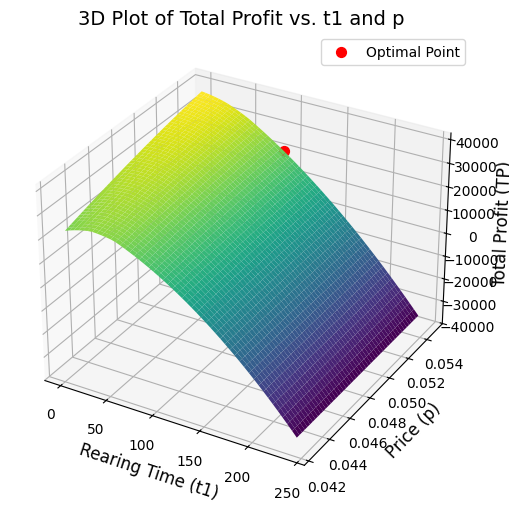

In [56]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# สร้างช่วงของค่า t1 และ p
t1_range = np.linspace(0, 240, 50)     # 50 ค่าในช่วง 70 ถึง 240
p_range = np.linspace(0.0425, 0.0548, 50)  # 50 ค่าในช่วง 0.0425 ถึง 0.0548

# กำหนด T คงที่ (ตามโจทย์ที่เราต้องการ)
T = 240

# สร้าง meshgrid
T1, P = np.meshgrid(t1_range, p_range)
TP = np.zeros_like(T1)

# คำนวณ Total Profit (TP) สำหรับแต่ละคู่ (t1, p)
# โดยใช้ฟังก์ชัน total_profit ที่นิยามไว้ (return เป็น -กำไร)
# เราต้องการกำไรจริงๆ จึงใส่เครื่องหมายลบอีกครั้ง
for i in range(T1.shape[0]):
    for j in range(T1.shape[1]):
        TP[i, j] = -(total_profit([T1[i, j], P[i, j]]))

# ดึงค่าที่เหมาะสมจาก result
optimal_t1 = result.x[0]
optimal_p  = result.x[1]
optimal_profit = -result.fun  # กำไรสูงสุด (เพราะใน total_profit return เป็น -TP)

# สร้างกราฟ 3 มิติ
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

# พล็อตพื้นผิว (Surface Plot) ไม่มีเส้นตารางบนผิว
surf = ax.plot_surface(
    T1, P, TP,
    cmap='viridis',    # สีพื้นผิว
    edgecolor='none'   # ไม่ให้มีเส้นขอบบนพื้นผิว
)

# พล็อตจุด Optimal Point ลงบนกราฟ
ax.scatter(
    optimal_t1,
    optimal_p,
    optimal_profit,
    color='red',
    s=50,
    label='Optimal Point'
)

# ตั้งค่าป้ายกำกับแกน
ax.set_xlabel('Rearing Time (t1)', fontsize=12)
ax.set_ylabel('Price (p)', fontsize=12)
ax.set_zlabel('Total Profit (TP)', fontsize=12)
ax.set_title('3D Plot of Total Profit vs. t1 and p', fontsize=14)

# แสดง Legend
ax.legend()

# แสดงกราฟ
plt.show()

Optimal t1: 240.0
Optimal T: 365.0
Maximum Total Profit: 3955939465085.088


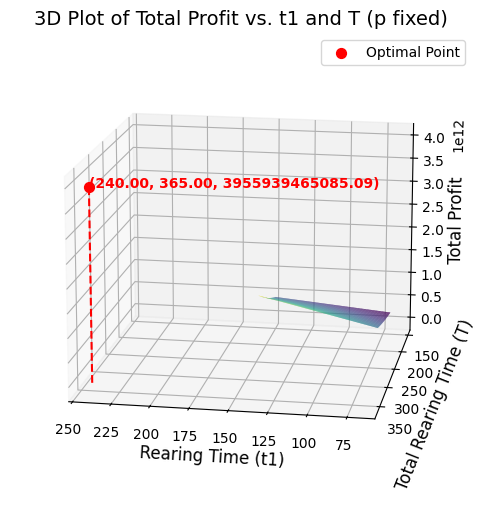

In [57]:
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# ========================
# สมมติว่าฟังก์ชันต่อไปนี้มีอยู่แล้ว
# total_cost(t1, T, p)
# total_revenue(t1, T, p)
# I1(t1)
# I2(t1, p, T)
# ========================

# กำหนดราคาขาย (p) เป็นค่าคงที่
p_fixed = 0.043

# ฟังก์ชันกำไร (Total Profit) - ต้องการหาค่าสูงสุด => ใช้ลบเพื่อ minimize
def total_profit(params):
    t1, T = params
    TR = total_revenue(t1, T, p_fixed)
    TC = total_cost(t1, T, p_fixed)
    return -(TR - TC)  # ลบเพื่อให้ minimize ทำงานเหมือน maximize

# ข้อจำกัด 1: T >= t1
def constraint_T_greater_than_t1(params):
    t1, T = params
    return T - t1

# ข้อจำกัด 2: I1(t1) = I2(t1, p, T) (Continuity)
def continuity_constraint(params):
    t1, T = params
    return I1(t1) - I2(t1, p_fixed, T)

# กำหนดค่าเริ่มต้นและขอบเขตของ [t1, T]
initial_guess = [120, 240]
bounds = [(70, 240), (90, 365)]

# สร้างข้อจำกัดรวม
constraints = [
    {'type': 'ineq', 'fun': constraint_T_greater_than_t1},
    {'type': 'eq', 'fun': continuity_constraint}
]

# หาค่าที่เหมาะสม
result = minimize(
    total_profit,
    initial_guess,
    bounds=bounds,
    constraints=constraints,
    method='SLSQP'
)

# ดึงค่าผลลัพธ์
optimal_t1 = result.x[0]
optimal_T  = result.x[1]
optimal_profit = -result.fun  # เนื่องจากใช้ minimize จึงต้องกลับค่า

# แสดงผลลัพธ์
print("Optimal t1:", optimal_t1)
print("Optimal T:", optimal_T)
print("Maximum Total Profit:", optimal_profit)

# =============================
# พล็อตกราฟ 3 มิติ (t1, T) -> Total Profit
# =============================

# สร้างช่วงของค่า t1 และ T
t1_range = np.linspace(70, 150, 40)
T_range  = np.linspace(150, 240, 40)

# สร้าง meshgrid
T1, TT = np.meshgrid(t1_range, T_range)
TP = np.zeros_like(T1)

# คำนวณกำไรที่เป็นบวก (TR - TC) สำหรับแต่ละจุด (t1, T)
for i in range(T1.shape[0]):
    for j in range(T1.shape[1]):
        if TT[i, j] < T1[i, j]:
            TP[i, j] = np.nan  # ให้เป็น NaN ถ้า T < t1
        else:
            TP[i, j] = -total_profit([T1[i, j], TT[i, j]])

# สร้าง figure 3 มิติ
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

# พล็อตพื้นผิว
surf = ax.plot_surface(T1, TT, TP, cmap='viridis', edgecolor='none')

# พล็อตจุด Optimal
ax.scatter(optimal_t1, optimal_T, optimal_profit, color='red', s=50, label='Optimal Point')

# พล็อตเส้นแนวดิ่งจาก (t1*, T*) ไปยังจุดสูงสุด
ax.plot([optimal_t1, optimal_t1], [optimal_T, optimal_T], [0, optimal_profit], color='red', linestyle='dashed')

# เพิ่มข้อความที่จุดสูงสุด (t1*, T*, TP*)
ax.text(optimal_t1, optimal_T, optimal_profit,
        f'({optimal_t1:.2f}, {optimal_T:.2f}, {optimal_profit:.2f})',
        color='red', fontsize=10, fontweight='bold')

# ตั้งชื่อแกน
ax.set_xlabel('Rearing Time (t1)', fontsize=12)
ax.set_ylabel('Total Rearing Time (T)', fontsize=12)
ax.set_zlabel('Total Profit', fontsize=12)
ax.set_title('3D Plot of Total Profit vs. t1 and T (p fixed)', fontsize=14)

# ปรับมุมมองให้เห็นความเว้าโค้ง
ax.view_init(elev=15, azim=100)

ax.legend()
plt.show()